# Section 2 - Principal Components Analysis

### PCA is a linear transformation: 

\begin{equation*}
Z = XQ
\end{equation*}

If a vector is multiplied by a scalar, the direction stays the same, however, the length can be changes.

If a vector is multiplies by a matrix it can "point" in a new direction (rotated).

Input data X is of shape (N, D).

Tranformation matrix Q is of shape (D x D).

Transformed data Z is of shape (N x D).

Multiplying a vector by a matrix can be seen as rotating the coordinate system of the vector.

### PCA is often used for dimensionality reduction.

Information carried by a variable can be assesed by measuring the variance.

A variable having variance equal to zero provides no information.

### Another advantage of PCA is that it de-correlate the variables.

High correlation between two variables means that one of them can be disregarded since they provide (approximately) very similar information. 

The goal of PCA is to find a matrix Q that will help us find the correlation between the variable so that we have the smallest number of the most crucial information   

### PCA can help reducing the impact of noise

Assuming that the noise is not a major factor in the data, it is fair to state the principal component of the noise will be somewhere down the list. Thus, the PCA transformation will perform denoising pre-processing.

Furthermore, by reducing number of parameters, risk of fitting the model to the noise or overfitting is significantly reduced.

### Latent variables Z can be interpreted as the underlying cause of X

That examplains them being significantly uncorrelated. 
 
Very important: Uncorrelated does not necessarily mean independent, unless distribution is Gaussian.

### In PCA, the linear transformation can be applied both ways:

\begin{equation*}
Z = XQ
\end{equation*}

\begin{equation*}
X = ZQ^{-1}
\end{equation*}

### PCA Derivation

Covariance of X is given as:
\begin{equation*}
Cov(X)= \frac{1}{N} (X - \mu _{X})^{T} (X - \mu _{X})
\end{equation*}

Cov(X) is a D by D matrix.


### Eigenvalues and Eigenvectors

Eigenvectors (v) are non-zero vectors vectors  that only change by a scalar factor , when a linear transformation is applied to it.

\begin{equation*}
Av = \lambda v
\end{equation*}

The equation can be re-written as:

\begin{equation*}
| Av - \lambda I | v = 0
\end{equation*}

It has a non-zero solution if and only if the determinant is zero:
\begin{equation*}
det| Av - \lambda I | = 0
\end{equation*}

&#955; is known as the eigenvalues or characteristic root associated with the eigenvector v.

The goal is to find the eigenvalues and corresponding to them eigenvectors.

There will be D number of eigenvalues (because X is of shape N by D) and their values will be greater or equal to zero.

After finding the eigenvectors and corresponding to them eigenvalues the eigenvalues will be sorted in the descending order and combined in a diagonal matrix:

\begin{equation*}
\wedge = \begin{pmatrix}
\lambda_{1} & 0 & . & 0\\ 
0 & \lambda_{2} & . & 0 \\ 
. & . & . &. \\ 
. & . & . & \lambda_{D}
\end{pmatrix}
\end{equation*}

A V matrix is constructed as follows:
\begin{equation*}
V = \begin{pmatrix}
1 & 1  & .  & 1 \\ 
v_{1} & v_{2} & . & v_{D}\\ 
1 & 1 & . &  1
\end{pmatrix}
\end{equation*}

The V matrix is orthonormal which results in that if the vector V is multiplied by another eigenvector the result will be zero.

\begin{equation*}
Cov(X)V = V \lambda
\end{equation*}

Furthermore, covariance of Z is given as:
\begin{equation*}
Cov(Z)= \frac{1}{N} (Z - \mu _{Z})^{T} (Z - \mu _{Z}) = \frac{1}{N} (XQ - \mu _{X}Q)^{T} (XQ - \mu _{X}Q) =  \frac{1}{N} Q^{T}(X - \mu _{X})^{T} (X - \mu _{X})Q = Q^{T} Cov(X) Q
\end{equation*}

By choosing Q = V we obtain:
\begin{equation*}
Cov(Z) = V^{T} Cov(X) V = V^{T} V \wedge = \wedge
\end{equation*}

Off diagonal elements are equal to zero which means that no dimension is correlated with any other dimension.
All values of &#955; were sorted in descending order so the first column of Z has the most variance and thus carries the most information.

### PCA Objective Function
PCA minimized objection function given as:
\begin{equation*}
J = Cov(|X - X_{reconstructed} |^{2}) 
\end{equation*}

Perfect reconstruction would lead to the error being equal to zero, because:
\begin{equation*}
X_{reconstructed} = X Q Q^{-1}
\end{equation*}
Since:
\begin{equation*}
Q Q^{-1} = I
\end{equation*}

Furthermore, Q is orthonormal so:
\begin{equation*}
Q^{-1} = Q^{T}
\end{equation*}

Finally, we can re-state the problem as:
\begin{equation*}
X_{reconstructed} = X Q Q^{T}
\end{equation*}

### Reconstruction

The initial data can be reconstructed with a K number of eigenvectors leading to a non-zero reconstruction error. It is a trade-off for lower dimensionality.

\begin{equation*}
X_{reconstructed} = X Q_{K} Q_{K}^{T}
\end{equation*}

In that scenario the objective function is re-written as (often referred to as Frobenius Norm):
\begin{equation*}
J = Cov(|x(n) - Q_{K} Q_{K}^{T} x(n) |^2) =|X - XQ_{K} Q_{K}^{T}|_{F}^2
\end{equation*}

### More information and explanations can be found:

- https://www.youtube.com/watch?v=jPmV3j1dAv4

- https://www.youtube.com/watch?v=_UVHneBUBW0

## Example

### Loading the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [2]:
def getKaggleMNIST():
    # Column 0 is labels
    # Column 1-785 is data, with values 0 .. 255
    train = pd.read_csv('./data/Section 2/train.csv').as_matrix().astype(np.float32)
    train = shuffle(train)

    Xtrain = train[:-1000, 1:] / 255
    Ytrain = train[:-1000, 0].astype(np.int32)

    Xtest  = train[-1000:, 1:] / 255
    Ytest  = train[-1000:, 0].astype(np.int32)
    return Xtrain, Ytrain, Xtest, Ytest

In [3]:
Xtrain, Ytrain, Xtest, Ytest = getKaggleMNIST()

In [4]:
Xtrain.shape

(41000, 784)

### PCA from Sklearn

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA()
reduced = pca.fit_transform(Xtrain)

In [7]:
reduced.shape

(41000, 784)

In [8]:
# Variance of each column
pd.DataFrame(data=reduced).var()

0      5.148213e+00
1      3.780208e+00
2      3.241073e+00
3      2.842828e+00
4      2.583286e+00
5      2.272010e+00
6      1.733652e+00
7      1.525893e+00
8      1.461442e+00
9      1.238263e+00
10     1.109719e+00
11     1.087919e+00
12     8.989290e-01
13     8.935689e-01
14     8.348978e-01
15     7.824407e-01
16     6.966809e-01
17     6.763610e-01
18     6.272737e-01
19     6.081602e-01
20     5.652640e-01
21     5.368615e-01
22     5.099415e-01
23     4.815637e-01
24     4.686146e-01
25     4.433117e-01
26     4.295525e-01
27     4.101386e-01
28     3.903434e-01
29     3.631820e-01
           ...     
754    2.093923e-32
755    2.093998e-32
756    2.093961e-32
757    2.094007e-32
758    2.094007e-32
759    2.093966e-32
760    2.093992e-32
761    2.093996e-32
762    2.093908e-32
763    2.093962e-32
764    2.093852e-32
765    2.093995e-32
766    2.093982e-32
767    2.094007e-32
768    2.093949e-32
769    2.093900e-32
770    2.093981e-32
771    2.094006e-32
772    2.093855e-32


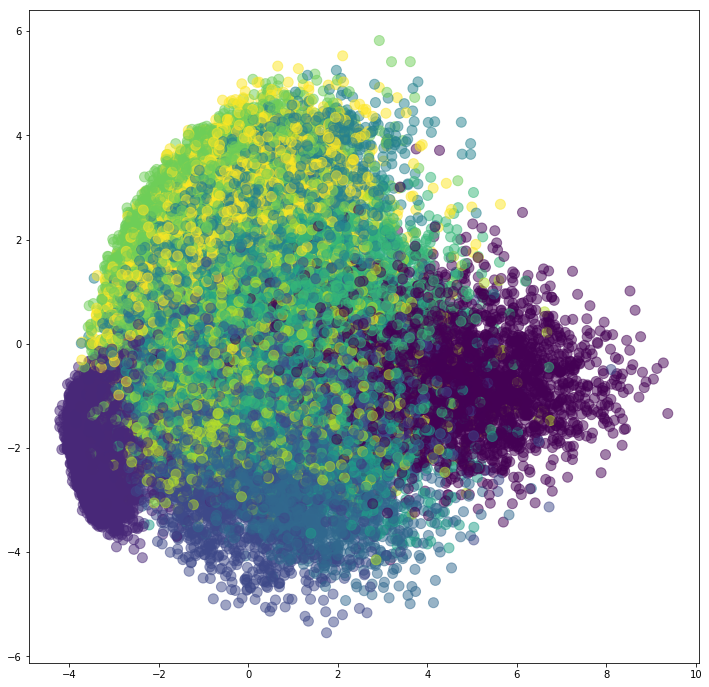

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 12))
plt.scatter(reduced[:, 0], 
            reduced[:, 1], 
            s = 100, 
            c = Ytrain, 
            alpha = 0.5)
plt.show()

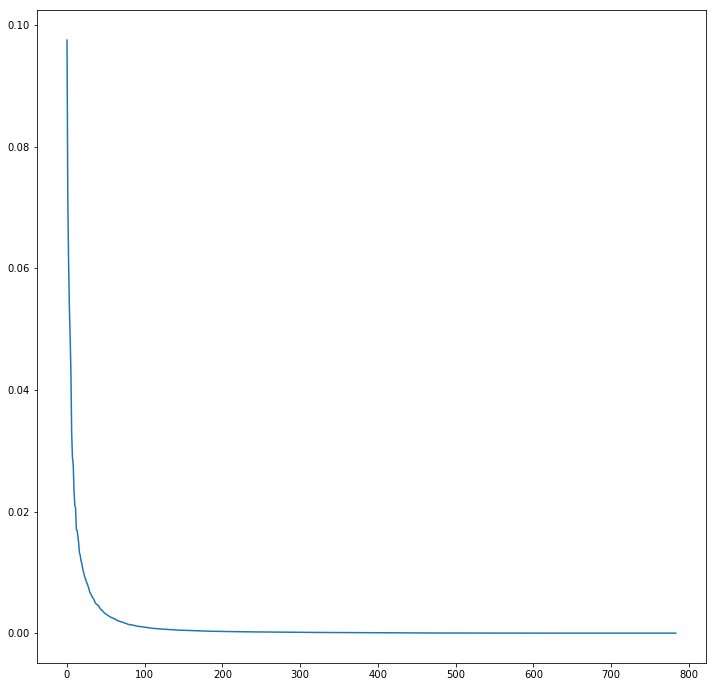

In [10]:
plt.figure(figsize = (12, 12))
plt.plot(pca.explained_variance_ratio_)
plt.show()

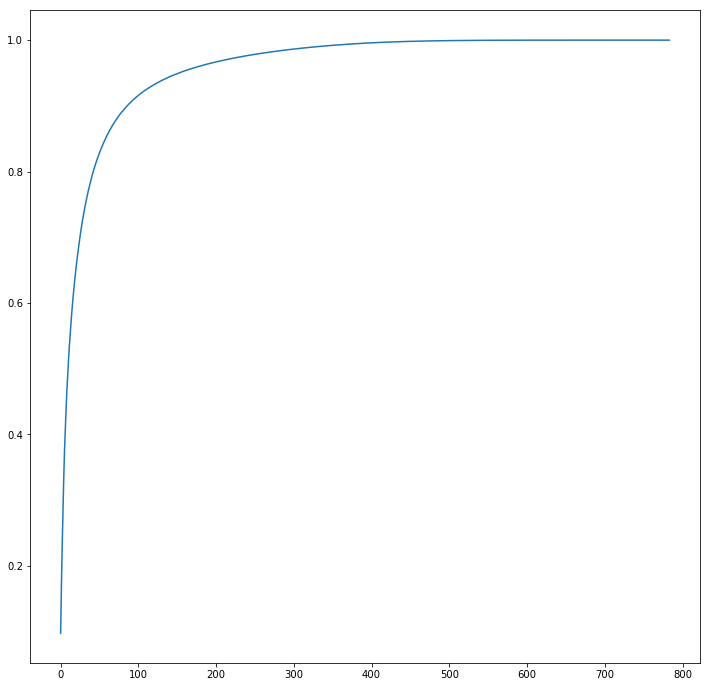

In [11]:
# In order to not to lose too much information, the number of dimensions the data is reduced to should be chosen in such way that 
# the cummulative information is above 95%. 
# In this scenario it 
cumulative = []
last = 0
for v in pca.explained_variance_ratio_:
    cumulative.append(last + v)
    last = cumulative[-1]
plt.figure(figsize = (12, 12))
plt.plot(cumulative)
plt.show()